# Ecosistema actual, Huggingface y modelos pre entrenados.

---

# Modelos:

## 1. [Swin Transformer](https://huggingface.co/docs/transformers/model_doc/swin)
- **Tipo:** Transformer jerárquico.
- **Características:**
  - Utiliza ventanas deslizantes (windowed attention) para atención local.
  - Crea representaciones jerárquicas a partir de imágenes.
  - Mejora la escalabilidad en procesamiento de imágenes de alta resolución.

## 2. [Convolutional Vision Transformer (CvT)](https://huggingface.co/docs/transformers/model_doc/cvt)
- **Tipo:** Híbrido CNN y Transformer.
- **Características:**
  - Aplica convoluciones iniciales para captura de características locales.
  - Utiliza bloques de Transformer para modelar relaciones globales.
  - Eficiente en tareas de visión con reducción de complejidad computacional.

## 3. [MobileViT](https://huggingface.co/docs/transformers/model_doc/mobilevit)
- **Tipo:** Arquitectura eficiente para dispositivos móviles.
- **Características:**
  - Integra convoluciones y Transformers de forma modular.
  - Diseñada para balancear rendimiento y eficiencia en recursos limitados.
  - Optimizada para aplicaciones en tiempo real.

## 4. [Pyramid Vision Transformer](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/pvt#transformers.PvtForImageClassification)
- **Tipo:** Transformer con enfoque en múltiples escalas.
- **Características:**
  - Implementa arquitectura en pirámide para procesamiento de imágenes.
  - Captura información a diferentes resoluciones, mejorando la generalización.
  - Eficaz en la detección de características tanto finas como gruesas.


## 5. [Masked Autoencoder](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/vit_mae#vitmae)
- **Tipo:** Autoencoder con enmascaramiento.
- **Características:**
  - Enmascara partes de la imagen durante el entrenamiento para aprendizaje de características.
  - Similar al enmascaramiento en modelos de lenguaje como BERT.
  - Facilita la transferencia de conocimiento para tareas de preentrenamiento y finetuning.

---
---

# Guía para Trabajar con Modelos Preentrenados de Imágenes en Hugging Face con PyTorch



## 1. Preprocesamiento de los Datos

- **Redimensionamiento y normalización**: La clase `ImageProcessor` ajusta automáticamente la imagen a las dimensiones que el modelo necesita.

    ```python
    from transformers import AutoImageProcessor
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    inputs = processor(images=image, return_tensors="pt")
    ```

- **Augmentación de datos**: Puedes usar librerías como `torchvision` para agregar augmentación de datos y mejorar el rendimiento del modelo.

    ```python
    import torchvision.transforms as transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    ```
---

## 2. Trabajando con Modelos Preentrenados de Imágenes

### Pasos para usar modelos preentrenados:

1. **Instalación de librerías**: Hace falta tener instalada la librería `transformers` de Hugging Face, ya que ofrece acceso a modelos preentrenados y procesadores para el preprocesamiento de datos.

2. **Cargar el modelo y el procesador**: Se utiliza `AutoImageProcessor` para cargar el procesador que realizará el preprocesamiento de las imágenes (ajustes de tamaño, normalización, etc.), y por ejemplo `AutoModelForImageClassification` para cargar el modelo de clasificación preentrenado.

    ```python
    from transformers import AutoImageProcessor, AutoModelForImageClassification
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")
    ```

3. **Preprocesar las imágenes**: Se utiliza el procesador para convertir la imagen en un formato adecuado (tensor), que luego puede ser alimentado al modelo.

4. **Inferencia y uso de logits**: Los logits son los valores sin normalizar que el modelo genera para cada clase de salida. En una tarea de clasificación, estos logits indican qué tan seguro está el modelo de que una imagen pertenece a una clase específica. El índice del logit maximo corresponde a la clase predicha.

    **Ejemplo de uso de logits**:
    ```python
    inputs = processor(images=image, return_tensors="pt")  
    outputs = model(**inputs)  
    logits = outputs.logits
    ```

5. **Interpretar los logits**:  Para obtener la clase predicha, se toma el índice del logit más alto y se asocia con la etiqueta de la clase correspondiente.


    ```python
    predicted_class_idx = logits.argmax(-1).item()
     print(f"Predicción de clase: {model.config.id2label[predicted_class_idx]}")
    ```


---

## 3. Finetuning

El **finetuning** ajusta un modelo preentrenado para tareas específicas utilizando un conjunto de datos más pequeño. Esto se logra actualizando los pesos de las últimas capas.

### Pasos para realizar finetuning:


```python
from transformers import Trainer, TrainingArguments

# Argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir="results path",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    save_strategy="epoch",
    logging_dir="login path",
)

# Definir Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    tokenizer=processor
)

# Entrenamiento
trainer.train()
```

---

### Recursos:
- [Documentación de Hugging Face Transformers](https://huggingface.co/docs/transformers/index)
- [Procesamiento de Imágenes](https://huggingface.co/docs/transformers/main_classes/image_processor)
- [Entrenamiento y Finetuning](https://huggingface.co/docs/transformers/training)
- [Ejemplos](https://huggingface.co/docs/transformers/v4.45.2/en/notebooks)



---
---
# Tarea: Fine-tuning de un modelo Vision Transformer

1. **Objetivo**:
   Seleccione un modelo preentrenado que utilice Vision Transformers (ViTs) y un conjunto de datos adecuado. Realice un proceso de fine-tuning del modelo seleccionado.

   Pueden encontrar la documentacion de Transformers de Hugging Face en [Link](https://huggingface.co/docs/transformers/index)

   Datasets de imágenes en Hugging Face [Link](https://huggingface.co/datasets?modality=modality:image&sort=downloads)

   O pueden usar fuentes de preferencia.

   
2. **Una vez finalizado el fine-tuning**:
   - Justifique la elección del modelo preentrenado y del dataset.
   - Explique el proceso de fine-tuning realizado, especificando los parámetros ajustados y las modificaciones necesarias.
   - Evalúe el rendimiento del modelo preentrenado sin ajustes y compárelo con los resultados obtenidos tras el fine-tuning, discutiendo las mejoras o diferencias observadas.
---

A continuación sigue una pequeña ayuda:

In [1]:
%pip install transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


### Otra forma de buscar los datos en HuggingFace

In [2]:
#%pip install huggingface_hub

In [3]:
"""from huggingface_hub import list_datasets, dataset_info
keywords = ["beans", "images", "MMU"]  # Lista de palabras clave
datasets = list_datasets()
dataset_details = []
for dataset in datasets:
    if any(keyword in dataset.id for keyword in keywords):
        try:
            info = dataset_info(dataset.id)
            dataset_details.append({
                "id": dataset.id,
                "downloads": getattr(info, 'downloads', 0),  # Cantidad de descargas, predeterminado 0
                "likes": getattr(info, 'likes', 0),
                "comments": getattr(info, 'comments', 0)
            })
        except Exception as e:
            print(f"Error al obtener información del dataset {dataset.id}: {e}")
sorted_datasets = sorted(dataset_details, key=lambda x: x['downloads'], reverse=True)
for dataset in sorted_datasets[:20]: # 20 datasets más descargados
    print(f"{dataset['id']}: {dataset['downloads']} descargas")"""

'from huggingface_hub import list_datasets, dataset_info\nkeywords = ["beans", "images", "MMU"]  # Lista de palabras clave\ndatasets = list_datasets()\ndataset_details = []\nfor dataset in datasets:\n    if any(keyword in dataset.id for keyword in keywords):\n        try:\n            info = dataset_info(dataset.id)\n            dataset_details.append({\n                "id": dataset.id,\n                "downloads": getattr(info, \'downloads\', 0),  # Cantidad de descargas, predeterminado 0\n                "likes": getattr(info, \'likes\', 0),\n                "comments": getattr(info, \'comments\', 0)\n            })\n        except Exception as e:\n            print(f"Error al obtener información del dataset {dataset.id}: {e}")\nsorted_datasets = sorted(dataset_details, key=lambda x: x[\'downloads\'], reverse=True)\nfor dataset in sorted_datasets[:20]: # 20 datasets más descargados\n    print(f"{dataset[\'id\']}: {dataset[\'downloads\']} descargas")'

### Eligimos un set de datos y lo traemos

In [4]:
from datasets import load_dataset, DownloadConfig
download_config = DownloadConfig(delete_extracted=True, download_desc=None)
dataset = load_dataset("cifar10",download_config=download_config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.16k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/120M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [5]:
print(dataset)
print(dataset['train'].features)
print(dataset['train'][0])
print(dataset['train'].features['label'].names)


print(f"Tamaño del conjunto de entrenamiento: {len(dataset['train'])}")
print(f"Tamaño del conjunto de prueba: {len(dataset['test'])}")

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})
{'img': Image(mode=None, decode=True, id=None), 'label': ClassLabel(names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], id=None)}
{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x7F03DC813580>, 'label': 0}
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Tamaño del conjunto de entrenamiento: 50000
Tamaño del conjunto de prueba: 10000


### Modelos preentrenados

Haremos una inferencia con 3 tipos de ViT preentrenados sobre nuestra imagen de raccon y haremos conclusiones al respecto.

1) Vit Base Model: google/vit-base-patch16-224

In [6]:
import torch
import matplotlib.pyplot as plt
from PIL import Image

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

path = "raccoon.jpg"
image = Image.open(path)

cuda


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

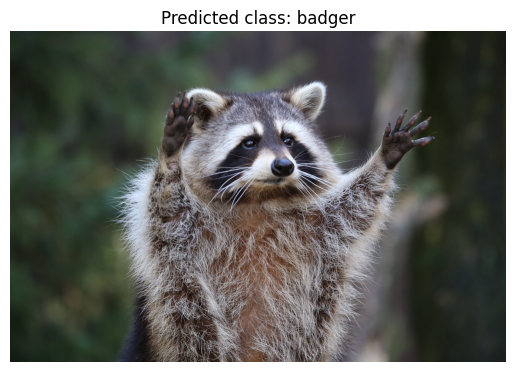

In [7]:
from transformers import ViTImageProcessor, ViTForImageClassification



path = "raccoon.jpg"
image = Image.open(path)

image_processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224").to(device)


inputs = image_processor(image, return_tensors="pt").to(device)

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
predicted_class = model.config.id2label[predicted_label]


plt.imshow(image)
plt.axis('off')
plt.title(f'Predicted class: {predicted_class}')
plt.show()


Dado que el modelo está preentrenado en ImageNet con 1000 clases, y entre ellas no se encuentra "raccoon" (mapache), es esperable que el modelo prediga alguna clase cercana dentro de las disponibles. Esto es justamente lo que ocurrió: el modelo devolvió "badger" (tejón), un animal de tamaño y apariencia similar al mapache.

2. Convolutional Vision Transoformer: microsoft/cvt-13

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/70.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/80.2M [00:00<?, ?B/s]

Predicted class: badger


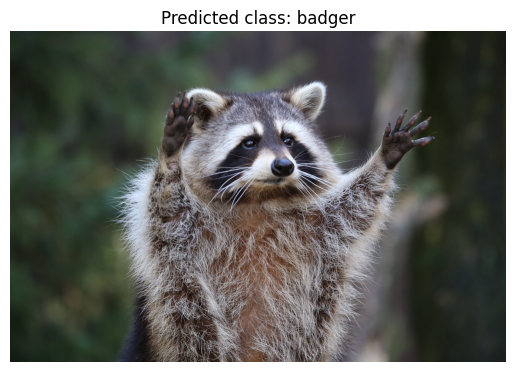

In [8]:
from transformers import AutoFeatureExtractor, CvtForImageClassification



feature_extractor=AutoFeatureExtractor.from_pretrained("microsoft/cvt-13")
model=CvtForImageClassification.from_pretrained("microsoft/cvt-13").to(device)

inputus=feature_extractor(images=image,return_tensors="pt").to(device)
outputs=model(**inputus)
logits=outputs.logits
predicted_class_idx=logits.argmax(-1).item()
print("Predicted class:",model.config.id2label[predicted_class_idx])

plt.imshow(image)
plt.axis('off')
plt.title(f'Predicted class: {predicted_class}')
plt.show()



Observamos la misma predicción que con el modelo ViT base de Google, lo cual es correcto, ya que el modelo CvT de Microsoft también fue entrenado con ImageNet 1K

3. Pyramid Vision Transformer (PVT): Zetatech/pvt-tiny-224

preprocessor_config.json:   0%|          | 0.00/171 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/70.0k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/52.9M [00:00<?, ?B/s]

Predicted class: badger


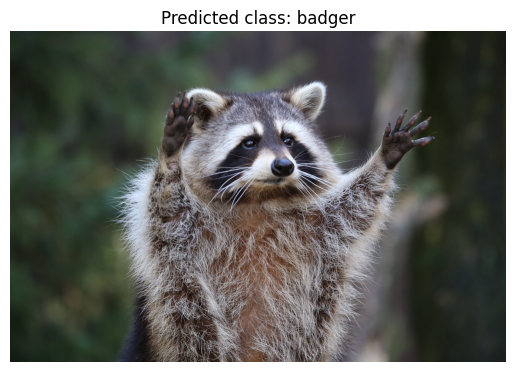

In [9]:
from transformers import PvtImageProcessor, PvtForImageClassification


processor=PvtImageProcessor.from_pretrained("Zetatech/pvt-tiny-224")
model=PvtForImageClassification.from_pretrained("Zetatech/pvt-tiny-224").to(device)

inputus=processor(images=image,return_tensors="pt").to(device)
outputs=model(**inputus)
logits=outputs.logits
predicted_class_idx=logits.argmax(-1).item()
print("Predicted class:",model.config.id2label[predicted_class_idx])

plt.imshow(image)
plt.axis('off')
plt.title(f'Predicted class: {predicted_class}')
plt.show()


Observamos la misma predicción tanto con el modelo ViT base de Google como con el CvT de Microsoft, lo cual es correcto, ya que el modelo PVT de Microsoft también fue entrenado con ImageNet 1K.

Conclusión;
 Los tres modelos (ViT base de Google, CVT de Microsoft y PVT de Microsoft) han devuelto la misma predicción lo que refleja que todos fueron entrenados con ImageNet 1K, un conjunto de datos que no incluye la clase "raccoon" (mapache). Esto llevó a que los modelos predijeran clases relacionadas, como "badger", que tienen características visuales similares. Estos resultados indican que, aunque los modelos son diferentes en su arquitectura, su desempeño es consistente debido a que comparten el mismo conjunto de datos de entrenamiento, ImageNet 1K. Para mejorar la precisión en la clasificación de mapaches, sería necesario un modelo entrenado específicamente con un dataset que incluya esta clase.

# Fine tuning

In [10]:
# inspeccionar dataset
dataset

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})

In [11]:
# diccioonario id-->label
id2label={id:label for id, label in enumerate(dataset['train'].features['label'].names)}
id2label

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [12]:
# diccionario label-->id
label2id={label:id for id, label in id2label.items()}
label2id

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [13]:
# Fine tuning con cvt-13 Microsoft

feature_extractor=AutoFeatureExtractor.from_pretrained("microsoft/cvt-13")
model_cvt=CvtForImageClassification.from_pretrained("microsoft/cvt-13").to(device)

In [14]:
# Revisamos si esta conectado a la GPU --> cuda
print(device)

cuda


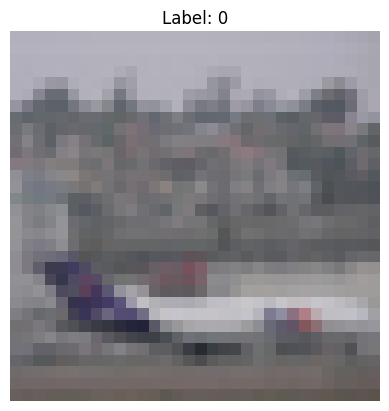

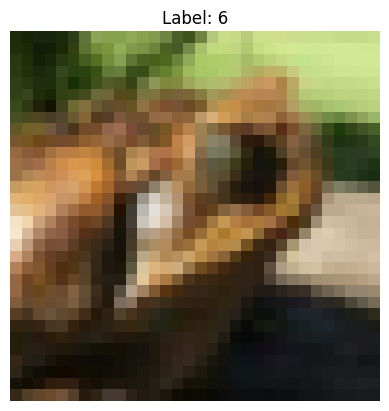

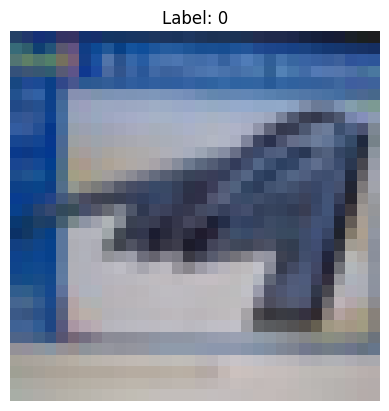

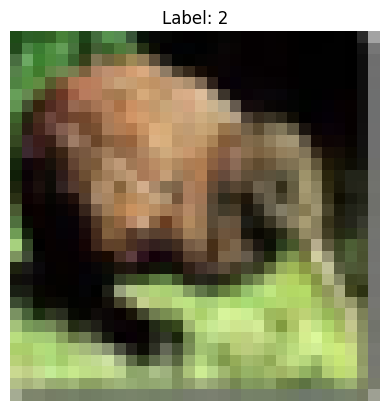

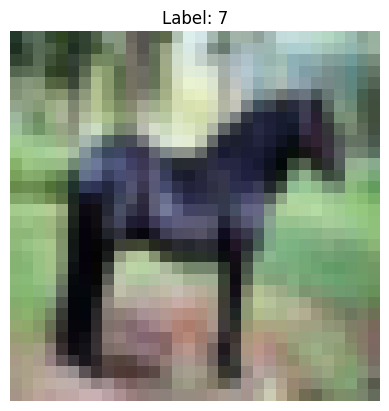

In [15]:
# Revisamos las 5 primeras img de train
for i in range(5):
    item = dataset['train'][i]

    plt.imshow(item['img'])
    plt.title(f"Label: {item['label']}")
    plt.axis('off')
    plt.show()

In [16]:
"""def preprocess_function(examples):
    inputs = feature_extractor(images=examples['img'], return_tensors="pt", padding=True)
    inputs['labels'] = torch.tensor([0] * len(examples['label']), dtype=torch.float)
    return inputs"""

In [17]:
def transform(example):
    inputs = feature_extractor(images=example['img'], return_tensors="pt").to(device)
    example['pixel_values'] = inputs['pixel_values'].squeeze().to(device)
    example['label'] = example['label']
    return example

In [18]:
train_dataset = dataset['train'].map(transform)
test_dataset = dataset['test'].map(transform)

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [19]:
from transformers import TrainingArguments, Trainer

In [20]:
import os
os.environ["WANDB_DISABLED"] = "true" # no utilizamos weights and biases

In [21]:
%pip install "accelerate>=0.26.0"

In [22]:
import accelerate
print(accelerate.__version__)


0.34.2


In [23]:
import numpy as np

training_args = TrainingArguments(
    output_dir="./cvt-finetuned-cifar10",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir='./logs',
    log_level = 'info',
    fp16 = True,
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = np.mean(preds == labels)
    return {"accuracy": accuracy}

trainer = Trainer(
    model=model_cvt,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    #compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
Using auto half precision backend
The following columns in the training set don't have a corresponding argument in `CvtForImageClassification.forward` and have been ignored: img. If img are not expected by `CvtForImageClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples 

Epoch,Training Loss,Validation Loss
1,2.216100,0.638142


Saving model checkpoint to ./cvt-finetuned-cifar10/checkpoint-500
Configuration saved in ./cvt-finetuned-cifar10/checkpoint-500/config.json
Model weights saved in ./cvt-finetuned-cifar10/checkpoint-500/model.safetensors
Saving model checkpoint to ./cvt-finetuned-cifar10/checkpoint-782
Configuration saved in ./cvt-finetuned-cifar10/checkpoint-782/config.json
Model weights saved in ./cvt-finetuned-cifar10/checkpoint-782/model.safetensors
The following columns in the evaluation set don't have a corresponding argument in `CvtForImageClassification.forward` and have been ignored: img. If img are not expected by `CvtForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 10000
  Batch size = 64


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=782, training_loss=1.839628019601183, metrics={'train_runtime': 6465.12, 'train_samples_per_second': 7.734, 'train_steps_per_second': 0.121, 'total_flos': 9.03054200832e+17, 'train_loss': 1.839628019601183, 'epoch': 1.0})

In [24]:
test_dataset.set_format(type='torch', columns=['pixel_values', 'label'])

In [25]:
outputs = trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `CvtForImageClassification.forward` and have been ignored: img. If img are not expected by `CvtForImageClassification.forward`,  you can safely ignore this message.

***** Running Prediction *****
  Num examples = 10000
  Batch size = 64


In [26]:
y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

In [27]:
print(np.unique(y_true))
print("")
print(np.unique(y_pred))

[0 1 2 3 4 5 6 7 8 9]

[0 1 2 3 4 5 6 7 8 9]


In [28]:
labels = train_dataset.features['label'].names

Classification Report:
              precision    recall  f1-score   support

    airplane       0.76      0.88      0.81      1000
  automobile       0.91      0.86      0.88      1000
        bird       0.77      0.64      0.70      1000
         cat       0.65      0.54      0.59      1000
        deer       0.80      0.71      0.75      1000
         dog       0.70      0.72      0.71      1000
        frog       0.80      0.88      0.84      1000
       horse       0.74      0.86      0.80      1000
        ship       0.83      0.87      0.85      1000
       truck       0.86      0.88      0.87      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



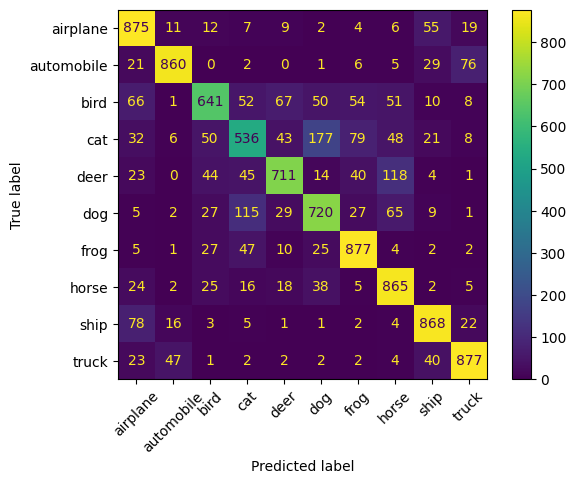

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45)

report = classification_report(y_true, y_pred, target_names=labels)
print("Classification Report:")
print(report)


El fine-tuning de la Convit con el dataset COCO ha mostrado un rendimiento aceptable, aunque con margen de mejora, especialmente considerando que se entrenó solo durante una sola época debido a restricciones de costo computacional. 

**Detalles de la evaluación:**

- Precisión: Promedio de 0.78, con un buen desempeño general, aunque algunas clases presentan puntuaciones más bajas.
- Recall: Promedio de 0.78, lo que indica que el modelo tiene una capacidad decente para detectar las instancias de cada clase.
- F1-Score: Promedio de 0.78, equilibrando precisión y recall, con algunas clases mostrando un rendimiento más débil.
- Accuracy: 0.78 en el conjunto total, lo que sugiere que el modelo ha generalizado razonablemente bien, aunque hay margen de mejora en algunas clases.

**Observaciones:**

Clases como automobile, truck, frog y ship tienen un desempeño fuerte con f1-scores de alrededor de 0.85 a 0.87, lo que refleja que estas clases se clasifican bastante bien.
Las clases bird, cat, y dog presentan un desempeño inferior, con f1-scores de entre 0.59 y 0.71, lo que indica que hay áreas donde el modelo podría mejorar en términos de clasificación.
La precisión y el recall de algunas clases, como airplane, bird, y deer, se encuentran en un rango medio, lo que sugiere que el modelo podría beneficiarse de más épocas de entrenamiento o de ajustes en el preprocesamiento de datos.
Conclusión:
Aunque los resultados son sólidos, el modelo aún presenta áreas de mejora, especialmente en clases como cat, bird y dog, donde las métricas son más bajas. Sin embargo, el rendimiento general sigue siendo positivo considerando que solo se entrenó durante una época. Esto resalta el potencial del fine-tuning con Convit cuando se aplica sobre un modelo preentrenado en ImageNet, un conjunto de datos diverso que cubre muchas de las clases presentes en COCO. Este preentrenamiento permite que el modelo haya aprendido representaciones y características generales útiles, facilitando la adaptación rápida a tareas específicas con una única época de entrenamiento